## Change DREAM Data into RACE Format

In [1]:
import json
import collections
import random

dream_train = 'train.json'
dream_dev = 'dev.json'
dream_test = 'test.json'

In [8]:
def answer_text_index_map(choices, answer):
    tokens = ['A', 'B', 'C', 'D']
    for choice_id, choice in enumerate(choices):
        if choice == answer:
            return tokens[choice_id]
    raise RuntimeError


def read_dream(input_file):
    dream_data = json.load(open(input_file, 'r'))
    race_data = []
    
    for item in dream_data:
        # 0: dialog
        # 1: questions and choices and answers
        # 2: dialog id
        item_id = item[2]
        context = '\n '.join(item[0])
        qa_list = item[1]
        
        options = [x['choice'] for x in qa_list]
        
        race_data.append({
            'article': context,
            'id': item_id,
            'questions': [x['question'] for x in qa_list],
            'options': options,
            'answers': list(map(lambda x, y: answer_text_index_map(x, y), options, [x['answer'] for x in qa_list]))
        })
        
    print(json.dumps(race_data[:2], indent=2))
        
    return race_data

# def generate_nrs_data(input_file):
#     dream_data = json.load(open(input_file, 'r'))
#     nrs_data = []
    
#     utter_pool = []
#     for item in dream_data:
#         dialog = item[0]
        
#         utter_pool.append(dialog)
    
#     for item in dream_data:
#         item_id = item[2]
#         dialog = item[0]
#         qa_list = item[1]
        
#         if len(dialog) < 4:
#             continue
#         dialog_nrs = []
#         for turn_idx, turn in enumerate(dialog):
#             if turn_idx < 2:
#                 continue
#             context = dialog[:(turn_idx - 1)]
#             query = 
        
#         for inter in turns_list:
#             if len(dialog) > inter[0] + 1:
#                 r1 = random.randint(inter[0], min(inter[1], len(dialog) - 1) - 1)
#                 context = dialog[:r1]
#                 query = dialog[r1]
#                 response = dialog[r1 + 1]
#                 samples = []
#                 for k in range(4):
#                     r = random.randint(0, len(utter_pool) - 1)
#                     rr = random.randint(0, len(utter_pool[r]) - 1)
#                     samples.append(utter_pool[r][rr])
#                 response_id = random.randint(0, 5)
#                 samples = samples[0:response_id] + [response] + samples[response_id:]
#                 nrs_data.append({
#                     'context': context,
#                     'query': query,
#                     'respones_id': response_id,
#                     'samples': samples
#                 })
                
#     print(len(nrs_data))
#     print(json.dumps(nrs_data[:2], indent=2))
#     return nrs_data

In [12]:
dream_in_race_test = read_dream(dream_test)

[
  {
    "article": "W: The movie next Tuesday has been cancelled due to lack of interest.\n M: What do you mean?\n W: Well, by last night only a few tickets has been sold.",
    "id": "4-199",
    "questions": [
      "What can we conclude about the movie?"
    ],
    "options": [
      [
        "They want to buy the tickets for the movie.",
        "The tickets for the movie were sold.",
        "The movie will not be shown."
      ]
    ],
    "answers": [
      "C"
    ]
  },
  {
    "article": "W: What does the term \"alternative energy source\" mean?\n M: When we think of energy or fuel for our homes and cars, we think of petroleum, a fossil fuel processed from oil removed from the ground, of which there is a limited supply. But alternative fuels can be many things. Wind, sun and water can all be used to create fuel.\n W: Is the threat of running out of petroleum real?\n M: It has taken thousands of years to create the natural stores of petroleum we have available at a much fas

In [13]:
dream_in_race_train = read_dream(dream_train)
dream_in_race_dev = read_dream(dream_dev)

[
  {
    "article": "M: I am considering dropping my dancing class. I am not making any progress.\n W: If I were you, I stick with it. It's definitely worth time and effort.",
    "id": "5-510",
    "questions": [
      "What does the man suggest the woman do?"
    ],
    "options": [
      [
        "Consult her dancing teacher.",
        "Take a more interesting class.",
        "Continue her dancing class."
      ]
    ],
    "answers": [
      "C"
    ]
  },
  {
    "article": "W: Well, I'm afraid my cooking isn't to your taste.\n M: Actually, I like it very much.\n W: I'm glad you enjoy it. Let me serve you some more fish.\n M: No, thank you. I've had enough fish, but I'd like some soup.\n W: Here it is. Help yourself!\n M: Thanks. I didn't know you were so good at cooking. If only my wife could learn to cook from you.\n W: Why not bring your wife next time? I haven't seen her for quite a while.\n M: OK, I will. She will be very glad to see you, too. Thank you for the wonderful m

In [14]:
print(len(dream_in_race_train))
print(len(dream_in_race_dev))
print(len(dream_in_race_test))

3869
1288
1287


In [15]:
with open('train_in_race.json', 'w') as f:
    json.dump(dream_in_race_train, f)
with open('dev_in_race.json', 'w') as f:
    json.dump(dream_in_race_dev, f)
with open('test_in_race.json', 'w') as f:
    json.dump(dream_in_race_test, f)

In [9]:
train_nrs = generate_nrs_data(dream_train)

1311
[
  {
    "context": [
      "W: Well, I'm afraid my cooking isn't to your taste.",
      "M: Actually, I like it very much.",
      "W: I'm glad you enjoy it. Let me serve you some more fish.",
      "M: No, thank you. I've had enough fish, but I'd like some soup.",
      "W: Here it is. Help yourself!",
      "M: Thanks. I didn't know you were so good at cooking. If only my wife could learn to cook from you."
    ],
    "query": "W: Why not bring your wife next time? I haven't seen her for quite a while.",
    "respones_id": 4,
    "samples": [
      "M: Well, madam, I understand that you manufacture computers, prepare software, and advise clients on how to use them. Is that right?",
      "M: Then they'll know you had people over without permission. Won't they be angry about that?",
      "M: Shall we go to the concert this evening? I have two tickets.",
      "M: Last week we learned first part of Unit 1. On Monday we finished Unit 1. On Wednesday we'll finish Unit 2. And on F

## Data Statistics for DREAM

In [13]:
from pytorch_pretrained_bert.tokenization import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('/home/jiaofangkai/bert-base-uncased-vocab.txt')

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter

def write_plot(dream_data):
    token_num_list = []
    for instance in tqdm(dream_data, total=len(dream_data)):
        article = instance['article']
        questions = instance['questions']
        answers = instance['answers']
        choices = instance['options']
        for question, choice_list in zip(questions, choices):
            for choice in choice_list:
                text = article + ' ' + question + ' ' + choice
                token_num = len(bert_tokenizer.tokenize(text))
                token_num_list.append(token_num)
                
    token_num_cnt = Counter(token_num_list)
    xy = sorted(token_num_cnt.items(), key=lambda x: x[0], reverse=False)
    x = [a[0] for a in xy]
    y = [a[1] for a in xy]
    plt.plot(x, y)
    plt.show()
    
    

def plot_number_of_turns(input_file):
    data = json.load(open(input_file, 'r'))
    turn_cnt = Counter()
    for item in data:
        dialog = item[0]
        turn_cnt[len(dialog)] += 1
        
    turn_cnt = sorted(turn_cnt.items(), key=lambda x: x[0], reverse=False)
    x = [a[0] for a in turn_cnt]
    y = [a[1] for a in turn_cnt]
    plt.plot(x, y)
    plt.show()

Model name '/home/jiaofangkai/bert-base-uncased-vocab.txt' was not found in model name list (bert-base-uncased, bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased, bert-base-multilingual-cased, bert-base-chinese). We assumed '/home/jiaofangkai/bert-base-uncased-vocab.txt' was a path or url but couldn't find any file associated to this path or url.


100%|██████████| 1287/1287 [00:13<00:00, 79.37it/s] 


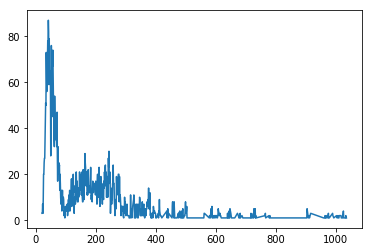

In [29]:
write_plot(dream_in_race_test)

100%|██████████| 1288/1288 [00:13<00:00, 66.96it/s] 


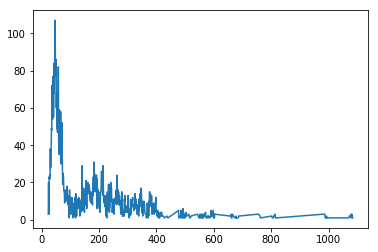

In [30]:
write_plot(dream_in_race_dev)

100%|██████████| 3869/3869 [00:40<00:00, 94.97it/s] 


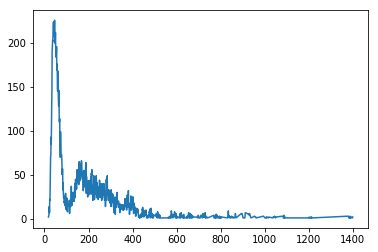

In [31]:
write_plot(dream_in_race_train)

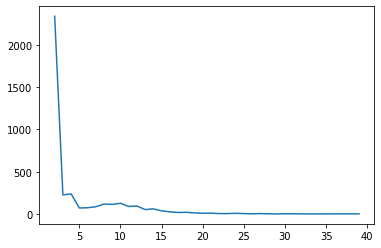

In [14]:
plot_number_of_turns(dream_train)

## Sentence Tokenization Test

In [33]:
import nltk

sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

article = dream_in_race_train[0]['article']

print(article)
print(json.dumps(sentence_tokenizer.tokenize(article), indent=2))

M: I am considering dropping my dancing class. I am not making any progress.
 W: If I were you, I stick with it. It's definitely worth time and effort.
[
  "M: I am considering dropping my dancing class.",
  "I am not making any progress.",
  "W: If I were you, I stick with it.",
  "It's definitely worth time and effort."
]
